In [1]:
path='/home/siddhant/Desktop/data_sets/automobile/1489_2704_bundle_archive'

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv(path+'/auto-mpg.csv')

In [4]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [5]:
data['horsepower'][32]=82
data['horsepower'][126]=70
data['horsepower'][330]=45
data['horsepower'][336]=86
data['horsepower'][354]=75
data['horsepower'][374]=82

/home/siddhant/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/siddhant/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/siddhant/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imp

In [6]:
list_brand=[]
for i in range(398):
    list_brand.append(data['car name'][i].split(" ")[0])

In [7]:
data['brand']=list_brand

In [8]:
data['brand'] = data['brand'].replace(['volkswagen','vokswagen','vw'],'volkswagen')
data['brand'] = data['brand'].replace('maxda','mazda')
data['brand'] = data['brand'].replace('toyouta','toyota')
data['brand'] = data['brand'].replace('mercedes-benz','mercedes')
data['brand'] = data['brand'].replace('nissan','datsun')
data['brand'] = data['brand'].replace('capri','ford')
data['brand'] = data['brand'].replace(['chevroelt','chevy'],'chevrolet')

In [9]:
data['brand'].value_counts()

ford          52
chevrolet     47
plymouth      31
dodge         28
amc           28
toyota        26
datsun        24
volkswagen    22
buick         17
pontiac       16
honda         13
mazda         12
mercury       11
oldsmobile    10
peugeot        8
fiat           8
audi           7
volvo          6
chrysler       6
renault        5
saab           4
opel           4
subaru         4
mercedes       3
cadillac       2
bmw            2
hi             1
triumph        1
Name: brand, dtype: int64

In [10]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,brand
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,chevrolet
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,buick
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,plymouth
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,amc
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,ford


"There are 406 observations on the following 8 variables: 

MPG (miles per gallon), 

cylinders, 

engine displacement (cu. inches),

horsepower,

vehicle weight (lbs.), 

time to accelerate from O to 60 mph (sec.),

model year (modulo 100), 

and origin of car (1. American, 2. European,3-Asian)

In [11]:
data['displacement_in_cc']=data['displacement']*16.387 #cu inches to cu cm(cc)

In [12]:
data['weight_in_kg']=data['weight']/2.205 #lbs to kg

In [13]:
data['mileage_kpl']=data['mpg']/2.352

In [14]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,brand,displacement_in_cc,weight_in_kg,mileage_kpl
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,chevrolet,5030.809,1589.115646,7.653061
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,buick,5735.450,1674.829932,6.377551
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,plymouth,5211.066,1558.276644,7.653061
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,amc,4981.648,1556.916100,6.802721
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,ford,4948.874,1564.172336,7.227891


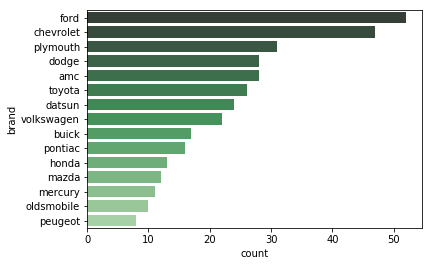

In [15]:
sns.countplot(y="brand",  data=data, palette="Greens_d",
              order=data.brand.value_counts().iloc[:15].index)

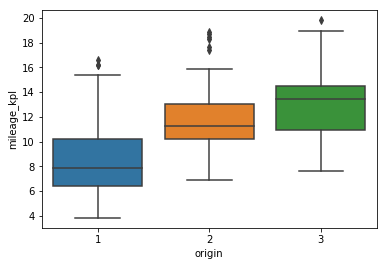

In [16]:
sns.boxplot(x=data['origin'],y=data['mileage_kpl']);

1-american origin

2-european origin

3-asian origin

its clear that the origin of the car has a good impact on the mileage,with asian cars dominating the league.

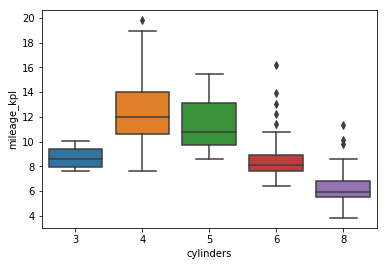

In [17]:
sns.boxplot(y=data['mileage_kpl'],x=data['cylinders']);

more the number of cylinder means more power which will burn more fuel and thus the mileage decreases.

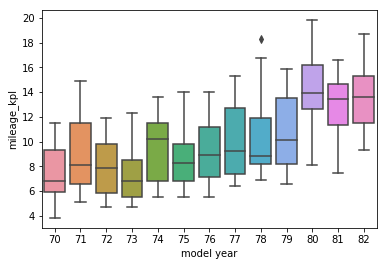

In [18]:
sns.boxplot(x=data['model year'],y=data['mileage_kpl']);

with the technology being updated every moment the performance of the vehicles has increased a lot

In [19]:
X=data.drop(['displacement','weight','car name','brand','mpg'],axis=1)

In [20]:
X.head()

,cylinders,horsepower,acceleration,model year,origin,displacement_in_cc,weight_in_kg,mileage_kpl
0,8,130,12.0,70,1,5030.809,1589.115646,7.653061
1,8,165,11.5,70,1,5735.450,1674.829932,6.377551
2,8,150,11.0,70,1,5211.066,1558.276644,7.653061
3,8,150,12.0,70,1,4981.648,1556.916100,6.802721
4,8,140,10.5,70,1,4948.874,1564.172336,7.227891


In [21]:
X.corr()

,cylinders,acceleration,model year,origin,displacement_in_cc,weight_in_kg,mileage_kpl
cylinders,1.000000,-0.505419,-0.348746,-0.562543,0.950721,0.896017,-0.775396
acceleration,-0.505419,1.000000,0.288137,0.205873,-0.543684,-0.417457,0.420289
model year,-0.348746,0.288137,1.000000,0.180662,-0.370164,-0.306564,0.579267
origin,-0.562543,0.205873,0.180662,1.000000,-0.609409,-0.581024,0.563450
displacement_in_cc,0.950721,-0.543684,-0.370164,-0.609409,1.000000,0.932824,-0.804203
weight_in_kg,0.896017,-0.417457,-0.306564,-0.581024,0.932824,1.000000,-0.831741
mileage_kpl,-0.775396,0.420289,0.579267,0.563450,-0.804203,-0.831741,1.000000


In [22]:
print(X.corr()["mileage_kpl"].sort_values(ascending=False))


mileage_kpl           1.000000
model year            0.579267
origin                0.563450
acceleration          0.420289
cylinders            -0.775396
displacement_in_cc   -0.804203
weight_in_kg         -0.831741
Name: mileage_kpl, dtype: float64


In [23]:
X.head()

,cylinders,horsepower,acceleration,model year,origin,displacement_in_cc,weight_in_kg,mileage_kpl
0,8,130,12.0,70,1,5030.809,1589.115646,7.653061
1,8,165,11.5,70,1,5735.450,1674.829932,6.377551
2,8,150,11.0,70,1,5211.066,1558.276644,7.653061
3,8,150,12.0,70,1,4981.648,1556.916100,6.802721
4,8,140,10.5,70,1,4948.874,1564.172336,7.227891


In [24]:
y=X['mileage_kpl']

In [25]:
X=X.drop(['mileage_kpl'],axis=1)

In [26]:
X.head()

,cylinders,horsepower,acceleration,model year,origin,displacement_in_cc,weight_in_kg
0,8,130,12.0,70,1,5030.809,1589.115646
1,8,165,11.5,70,1,5735.450,1674.829932
2,8,150,11.0,70,1,5211.066,1558.276644
3,8,150,12.0,70,1,4981.648,1556.916100
4,8,140,10.5,70,1,4948.874,1564.172336


In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
lr=LinearRegression()

In [29]:
from sklearn.model_selection import train_test_split

In [50]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20)

In [51]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [52]:
y_pred=lr.predict(X_test)

In [53]:
lr.score(X_test,y_test)

0.8201919698371818

In [54]:
from sklearn import metrics

In [55]:
metrics.r2_score(y_test,y_pred)

0.8201919698371818

In [56]:
X.columns

Index(['cylinders', 'horsepower', 'acceleration', 'model year', 'origin',
       'displacement_in_cc', 'weight_in_kg'],
      dtype='object')

honda city data--- 17-18 ANS

[4,120,9.7,100,3,1497,1160]   ------    predicted value=41.8mpg=17.19kpl

jaguar data ---- 15 ANS

[6,380,4.8,100,,2995,1600]   -------    predicted value=34.7 mpg=13.97kpl

ford gt-----10 ANS

[8,549,3.22,100,2,4296,1500] -------    predicted value=31.7mpg=12.6kpl

In [113]:
lr.predict([[4,120,9.7,100,3,1497,1160]])  #[[4,120,9.7,100,1,1497,1160]]

array([18.69253717])

In [114]:
lr.predict([[6,380,4.8,100,3,2995,1600]])  #[[6,380,4.8,100,3,2995,1600]]

array([13.76173929])

In [115]:
lr.predict([[8,549,3.22,100,1,4296,1500]]) #[[8,549,3.22,100,2,4296,1500]]

array([11.83380969])

In [117]:
lr.predict([[4,265,5.9,100,2,1995,1900]])

array([12.21215111])

In [40]:
X['displacement_in_cc'].describe()

count     398.000000
mean     3169.669886
std      1708.669838
min      1114.316000
25%      1708.344750
50%      2433.469500
75%      4293.394000
max      7456.085000
Name: displacement_in_cc, dtype: float64

In [41]:
X.head()

,cylinders,horsepower,acceleration,model year,origin,displacement_in_cc,weight_in_kg
0,8,130,12.0,70,1,5030.809,1589.115646
1,8,165,11.5,70,1,5735.450,1674.829932
2,8,150,11.0,70,1,5211.066,1558.276644
3,8,150,12.0,70,1,4981.648,1556.916100
4,8,140,10.5,70,1,4948.874,1564.172336


In [60]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 

In [61]:
model_rf = RandomForestRegressor(n_estimators=50)

In [62]:
model_rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=50,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [63]:
y_pred_rf = model_rf.predict(X_test)
MAE = mean_absolute_error(y_test , y_pred_rf)
print('Random forest validation MAE = ', MAE)

Random forest validation MAE =  0.7160926870748301


In [64]:
from sklearn import metrics
import numpy as np
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_rf))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_rf))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf)))


Mean Absolute Error: 0.7160926870748301
Mean Squared Error: 0.9329209798290069
Root Mean Squared Error: 0.9658783462884997


In [90]:
#honda city
model_rf.predict([[4,120,9.7,112,3,1497,1160]])

#31.09mpg=12.35kpl

array([13.4957483])

In [91]:
#jaguar ftype
model_rf.predict([[6,380,4.8,100,3,2995,1600]])

#24.914mpg=9.163kpl

array([10.00765306])

In [92]:
# ford gt
model_rf.predict([[8,549,3.22,100,2,4296,1500]])

#21.308mpg=9.02kpl

array([9.09183673])

In [119]:
# bmw 
#4 cyl 1995cc 265hp  europe 1800kg  5.5sec 100
model_rf.predict([[4,265,5.9,100,2,1995,1900]])

array([11.57057823])

In [93]:
X.columns

Index(['cylinders', 'horsepower', 'acceleration', 'model year', 'origin',
       'displacement_in_cc', 'weight_in_kg'],
      dtype='object')

In [120]:
pwd

'/home/siddhant/notebook files/mpg_project'

saving the model for further use

In [121]:
from sklearn.externals import joblib 

# Save the model as a pickle in a file 
joblib.dump(lr, 'mileage_model.pkl') 


/home/siddhant/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


['mileage_model.pkl']

In [122]:
# Load the model from the file 
lr_model = joblib.load('mileage_model.pkl') 


In [123]:
lr_model.predict([[4,120,9.7,100,3,1497,1160]])

array([18.69253717])